In [6]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [7]:
file_name = 'IL_employee_salary.csv'
salaries = []
with open(file_name, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        salary = row['Annual Salary'].replace(',','').replace('$', '')
        salaries.append(int(salary))
        

In [180]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


Q2. a.
A histogram of the number of employees in different salary brackets


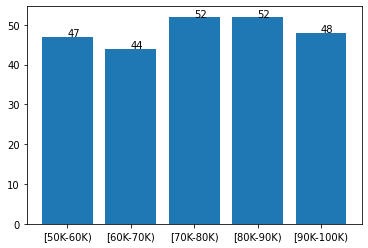

In [156]:
# Q2 part a.

print("Q2. a.")
print("A histogram of the number of employees in different salary brackets")


bins = [ 50000, 60000, 70000, 80000, 90000]
number_occurances = [
    len([salary for salary in salaries if salary>=50000 and salary<60000]),
    len([salary for salary in salaries if salary>=60000 and salary<70000]),
    len([salary for salary in salaries if salary>=70000 and salary<80000]),
    len([salary for salary in salaries if salary>=80000 and salary<90000]),
    len([salary for salary in salaries if salary>=90000 and salary<100000]),
]
x_labels = ["[50K-60K)", 
            "[60K-70K)", 
            "[70K-80K)", 
            "[80K-90K)",
            "[90K-100K)",
           ]

x_pos = [i for i, _ in enumerate(bins)]
plt.bar(x_pos,number_occurances)
plt.xticks(x_pos, x_labels)

for index, value in enumerate(number_occurances):
    plt.text(index, value, str(value))
    
plt.show()



Q2. b.
Sensitivity is 1, since this is a counting problem.
lambda should be 1/epsilon


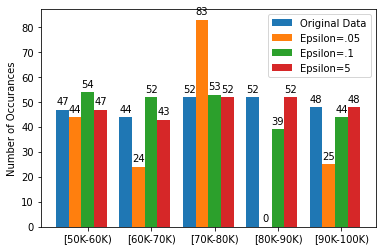

In [193]:
print("Q2. b.")
print("Sensitivity is 1, since this is a counting problem.")
print("lambda should be 1/epsilon")

number_occurances = [
    len([salary for salary in salaries if salary>=50000 and salary<60000]),
    len([salary for salary in salaries if salary>=60000 and salary<70000]),
    len([salary for salary in salaries if salary>=70000 and salary<80000]),
    len([salary for salary in salaries if salary>=80000 and salary<90000]),
    len([salary for salary in salaries if salary>=90000 and salary<100000])
]

epsilons = [.05, .1, 5]
preturbed_counts = [[],[],[]]


for count in number_occurances:
    for i, epsilon in enumerate(epsilons):
        loc, scale = count, 1/epsilon
        noise = np.random.laplace(loc, scale, 1)
        preturbed_counts[i].append(max(round(noise[0]),0))


preturbed_counts


x = np.arange(len(x_labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*2, number_occurances, width, label='Original Data')
rects2 = ax.bar(x - width, preturbed_counts[0], width, label='Epsilon=.05')
rects3 = ax.bar(x, preturbed_counts[1], width, label='Epsilon=.1')
rects4 = ax.bar(x + width, preturbed_counts[2], width, label='Epsilon=5')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

ax.set_ylabel('Number of Occurances')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()



plt.show()
# plt.bar(x_pos,preturbed_counts)
# plt.xticks(x_pos, x_labels)

# for index, value in enumerate(preturbed_counts):
#      ax.text(index, value, str(value))
    
# plt.show()
